<a href="https://colab.research.google.com/github/kayal466/Task-7-DW-26/blob/main/DW26_KNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library and dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
df=pd.read_csv("/content/trainKNN.csv")


In [16]:
df1= df.rename(columns={"1.52101":"RI","13.64":"NA","4.49":"Mg","1.10":"Al","71.78":"Si","0.06":"K","8.75":"Ca","0.00":"Ba","0.00.1":"Fe","1.1":"Type"})
df1

,1,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
190,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
191,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00,7
192,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
193,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7


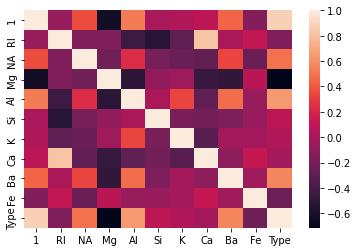

In [17]:
cor = df1.corr()
sns.heatmap(cor)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


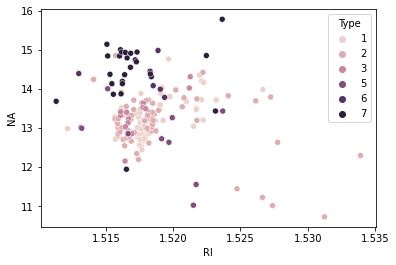

In [18]:
sns.scatterplot(df1['RI'],df1['NA'],hue=df1['Type'])

**Pair Plot**

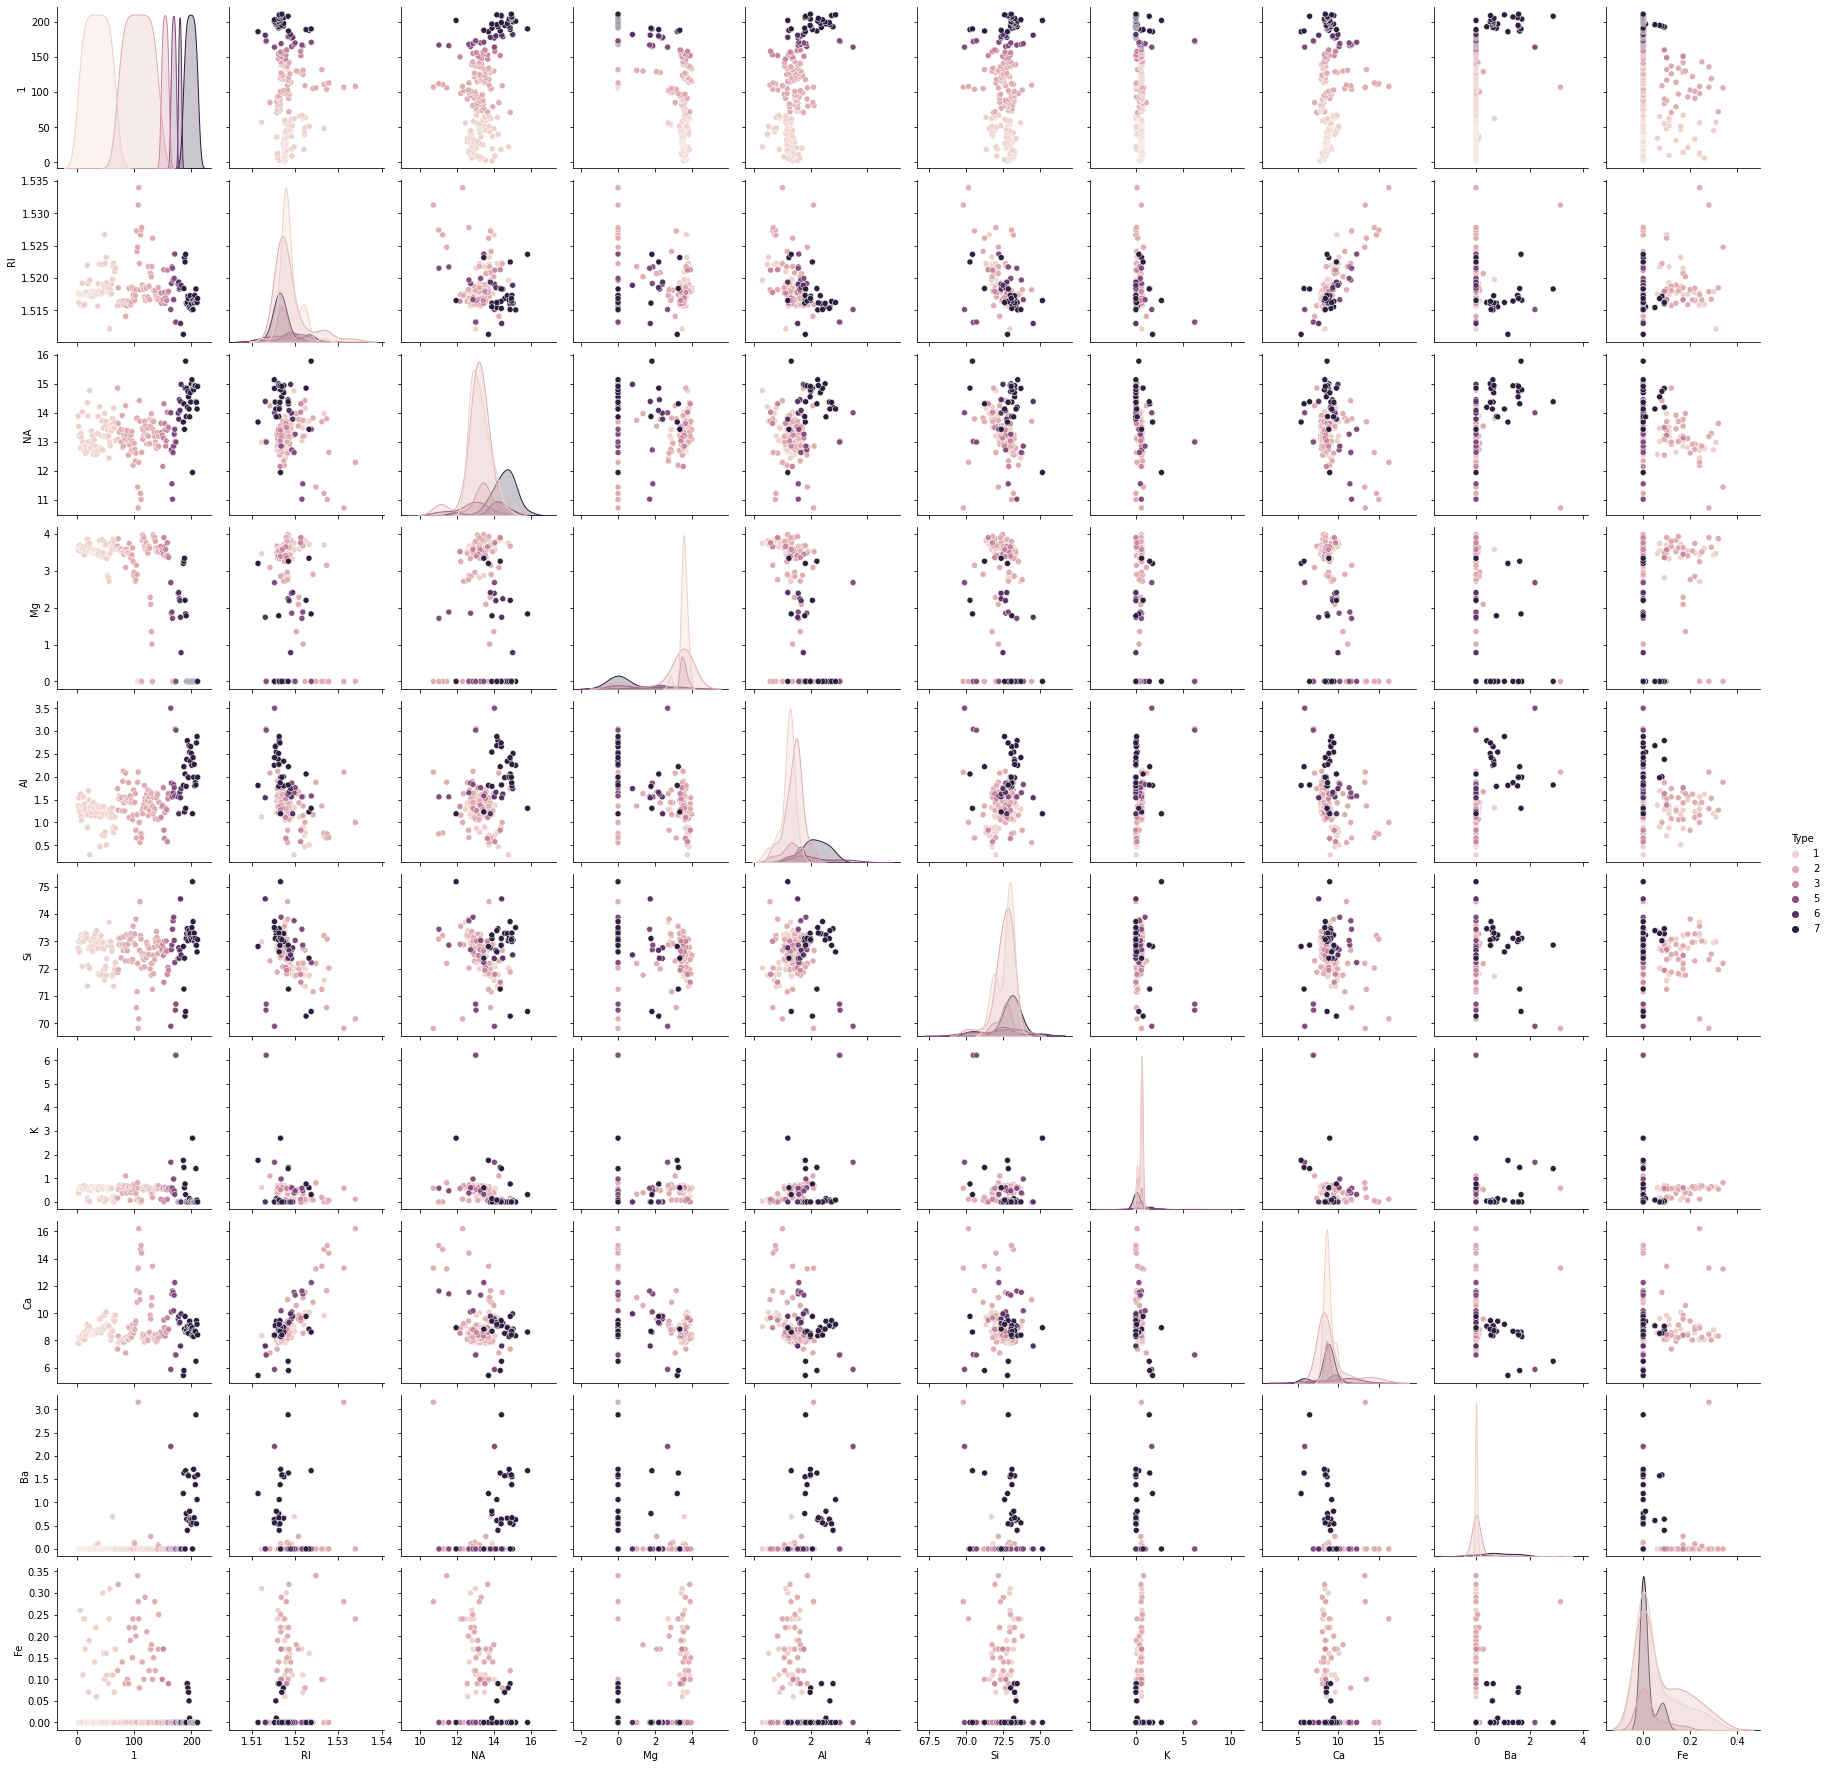

In [19]:
sns.pairplot(df1,hue='Type')
plt.show()

**Scaling the data**

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(df1.drop('Type',axis=1))

StandardScaler()

In [22]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [23]:
scaled_features = scaler.transform(df1.drop('Type',axis=1))
scaled_features

array([[-1.66868726, -0.22011315,  0.65927294, ..., -0.76087341,
        -0.34032621, -0.58542761],
       [-1.65222828, -0.6890813 ,  0.19945217, ..., -0.79604893,
        -0.34032621, -0.58542761],
       [-1.6357693 , -0.20371566, -0.2092774 , ..., -0.48650441,
        -0.34032621, -0.58542761],
       ...,
       [ 1.7383214 , -0.61693235,  1.27236731, ...,  0.37881322,
         0.77294966, -0.58542761],
       [ 1.75478038, -0.67268381,  0.97859292, ...,  0.18886545,
         1.84499309, -0.58542761],
       [ 1.77123936, -0.46935496,  1.97487126, ..., -0.35987256,
         2.93765275, -0.58542761]])

In [24]:
df_data = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1
0,-1.668687,-0.220113,0.659273,0.612722,-0.195821,0.118519,-0.062128,-0.760873,-0.340326,-0.585428
1,-1.652228,-0.689081,0.199452,0.576675,0.170756,0.460128,-0.196078,-0.796049,-0.340326,-0.585428
2,-1.635769,-0.203716,-0.209277,0.677607,-0.338379,-0.039147,0.071821,-0.486504,-0.340326,-0.585428
3,-1.619310,-0.282424,-0.132641,0.627141,-0.440206,0.578377,0.042055,-0.592031,-0.340326,-0.585428
4,-1.602851,-0.761230,-0.745735,0.619932,0.333679,0.433850,0.176004,-0.592031,-0.340326,2.427890


**Splitting data into training and testing**

In [28]:
dff = df_data.drop(['8.75','0.00'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,df1['Type'],test_size=0.3,random_state=45)

**Manhattan**

In [29]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [30]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [31]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

**Euclidean distance**

In [41]:
knn = KNeighborsClassifier(n_neighbors=4,metric='euclidean')

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [43]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

**Accuracy**

In [44]:
y_pred1= knn.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       0.68      0.95      0.79        20
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2
           7       0.90      0.64      0.75        14

    accuracy                           0.81        59
   macro avg       0.59      0.52      0.53        59
weighted avg       0.78      0.81      0.78        59



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
KNeighborsClassifier(...)
print(neigh.predict(X_test))
#print(neigh.predict_proba())

[1 2 1 1 1 1 7 2 1 1 2 2 2 1 1 7 3 3 2 2 2 2 1 2 2 1 3 2 1 7 7 1 2 7 2 7 1
 6 1 1 3 2 2 2 2 2 7 1 1 2 7 2 2 2 1 2 7 7 1]


In [32]:
y_pred = knn.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.74      1.00      0.85        20
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.64      0.78        14

    accuracy                           0.85        59
   macro avg       0.57      0.61      0.57        59
weighted avg       0.83      0.85      0.82        59



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
accuracy_score(y_test,y_pred)

0.847457627118644

**Visualizing**

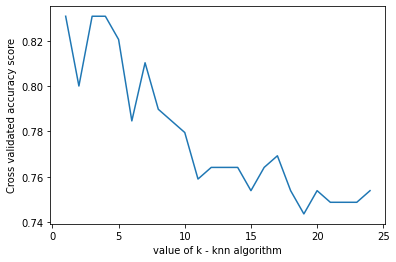

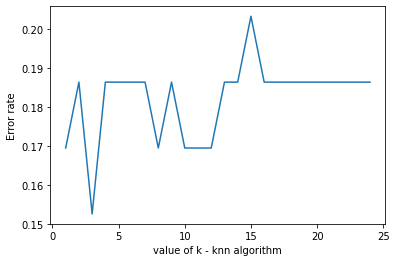

In [36]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,df1['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()